In [1]:
import pandas as pd 
import numpy as np
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from tqdm import tqdm
from tslearn.metrics import dtw

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
model_path = "/home/spankaew/Git/astrologics/models/dev/BN_TUTO_Fx/"
model_1 = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_Fx')
model_1.create_simulation()
model_1.create_attractor()
model_1.attractor.get_attractors()

Simulation object created
Attractor object created


100%|██████████| 2240/2240 [00:29<00:00, 76.23it/s]


Concatenate results into matrix


100%|██████████| 2240/2240 [00:03<00:00, 624.79it/s]


Attractors calculation completed


/home/spankaew/Git/astrologics/astrologics/model_attractors.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


In [79]:
model_path = "/home/spankaew/Git/astrologics/models/dev/BN_TUTO_init+Fx+Zero/"
model_2 = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_init+Fx+Zero')
model_2.create_simulation()
model_2.create_attractor()
model_2.attractor.get_attractors()

Simulation object created
Attractor object created


100%|██████████| 1120/1120 [00:15<00:00, 73.84it/s]


Concatenate results into matrix


100%|██████████| 1120/1120 [00:01<00:00, 990.07it/s]

Attractors calculation completed



/home/spankaew/Git/astrologics/astrologics/model_attractors.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


In [ ]:
model_path = "/home/spankaew/Git/astrologics/models/dev/BN_TUTO_init+t+Fx+Zero+UnivConstraints/"
model_3 = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_init+t+Fx+Zero+UnivConstraints')
model_3.create_simulation()
model_3.create_attractor()
model_3.attractor.get_attractors()

Simulation object created
Attractor object created


100%|██████████| 88/88 [00:02<00:00, 37.04it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1486.67it/s]

Attractors calculation completed



/home/spankaew/Git/astrologics/astrologics/model_attractors.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


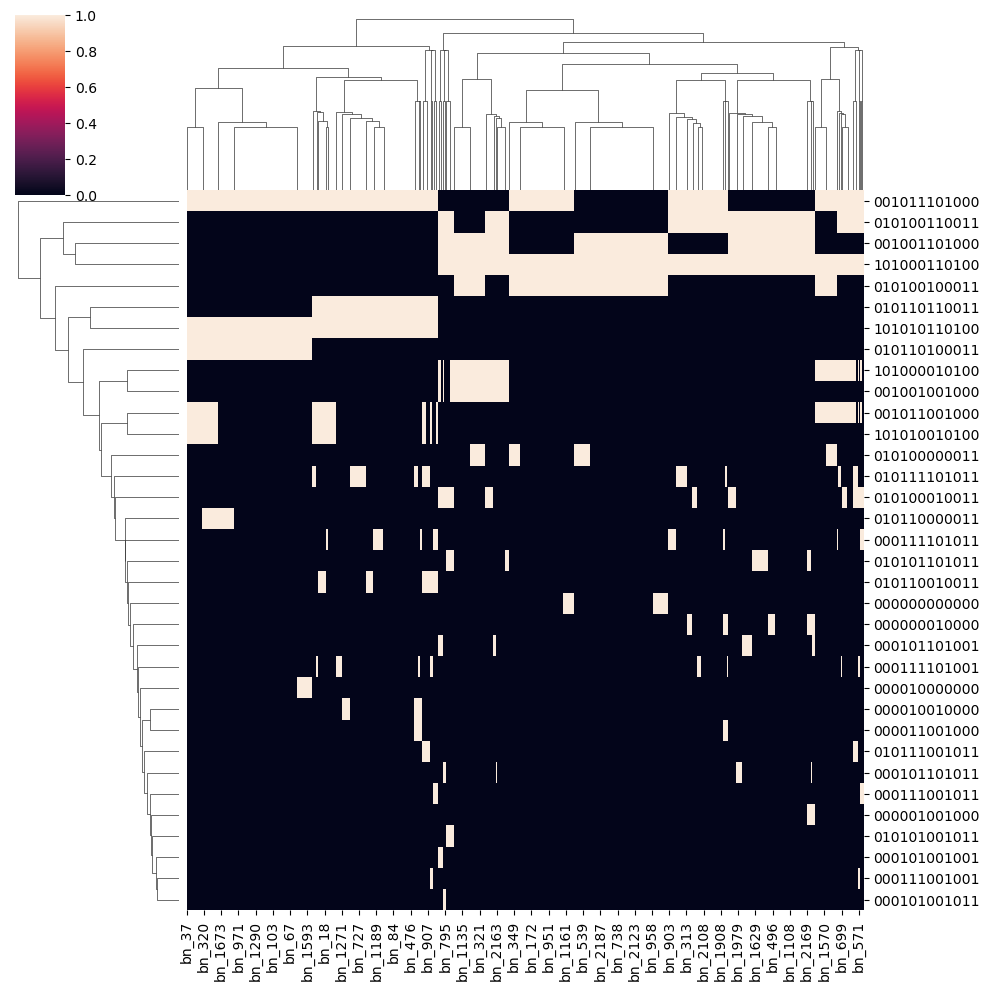

In [3]:
sns.clustermap(model_1.attractor.attractors_df)

In [3]:
concatenated_columns = model_1.attractor.attractors_df.apply(lambda col: ''.join(col.astype(str)), axis=0)
concatenated_columns.nunique()

75

INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


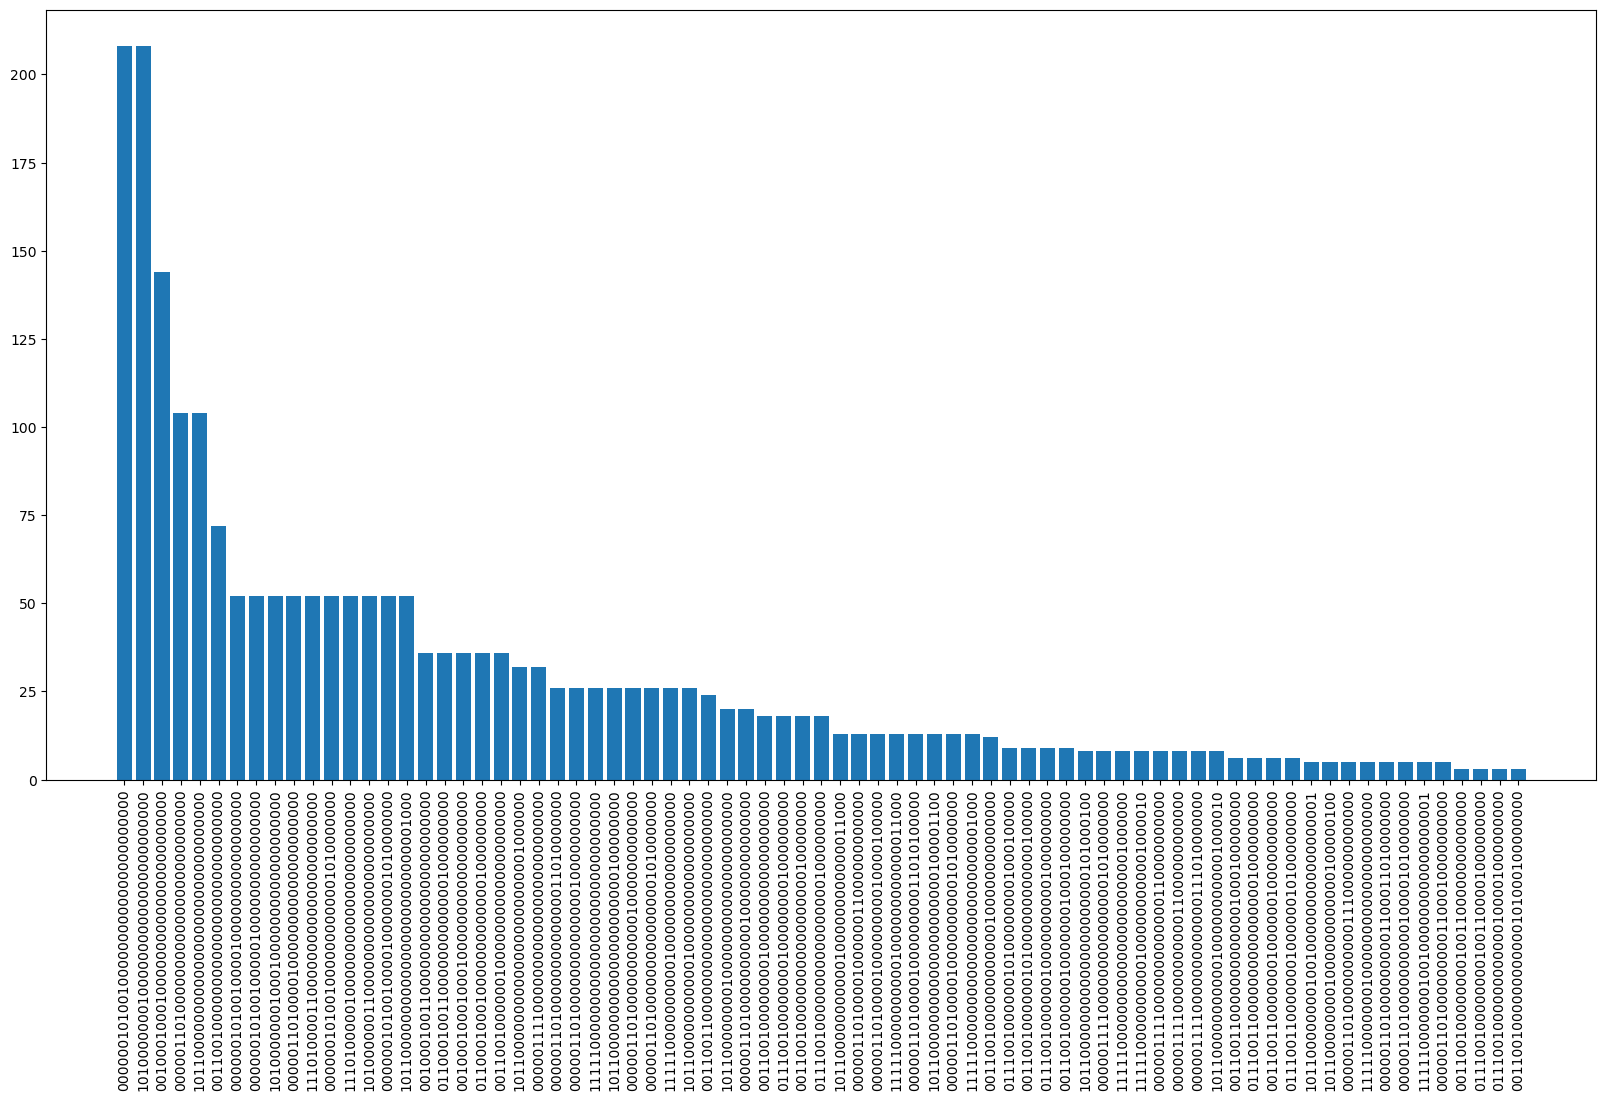

In [4]:
plt.figure(figsize=(20, 10))
vis_bar = concatenated_columns.value_counts().sort_values(ascending=False)
plt.bar(vis_bar.index, vis_bar.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
attractor_combo = vis_bar.index
unique_labels = {label: idx + 1 for idx, label in enumerate(concatenated_columns.unique())}

75

In [11]:
save_path = "/home/spankaew/Git/astrologics/tmp/"
model_1.create_simulation()
model_1.simulation.simulation_df = pd.read_csv(save_path + 'BN_TUTO_Fx_simulation.csv')

Simulation object created


In [ ]:
from sklearn.metrics import adjusted_rand_score
from tslearn.clustering import TimeSeriesKMeans

# Calculate kmeans clustering
model_1.create_trajectory()
model_1.trajectory.pca_trajectory()
attractor_combo_list = vis_bar.index
concatenated_columns = model_1.attractor.attractors_df.apply(lambda col: ''.join(col.astype(str)), axis=0)
simulation_df = model_1.trajectory.simulation_df
node_list = model_1.trajectory.node_list

rand_index_score = []
# For loop to calculate clustering and rand index
for i in tqdm(range(0, len(attractor_combo_list)-1)):
    if i == 0:
        attractor_combo = attractor_combo_list
    else:
        attractor_combo = attractor_combo_list[:-i]
    model_list = concatenated_columns.index[concatenated_columns.isin(attractor_combo)]
    
    # Calculate the k-mean_clustering
    simulation_df_sub = simulation_df[simulation_df['model_id'].isin(model_list)]
    model_name = list(simulation_df_sub['model_id'].unique())
    model_original_all = {}
    for j in model_name:
        model_original = simulation_df.loc[simulation_df.model_id == j,node_list].values
        model_original_all[j] = np.array(model_original)
    pca_all_trajectory = np.array(list(model_original_all.values()))
    
    # Euclidean k-means
    print("Euclidean k-means")
    km = TimeSeriesKMeans(n_clusters=75-i, metric = 'euclidean', verbose=False, random_state=12345)
    y_pred = km.fit_predict(pca_all_trajectory, ensure_all_finite=True)
    cluster_dict = dict(zip(list(model_name),list(y_pred)))

    # Get the cluster labels
    concatenated_columns_sub = concatenated_columns[concatenated_columns.isin(attractor_combo)]
    unique_labels = {label: idx + 1 for idx, label in enumerate(concatenated_columns_sub.unique())}
    concatenated_columns_sub = concatenated_columns_sub.map(unique_labels)

    # Create a DataFrame from the cluster dictionary
    cluster_df = pd.DataFrame.from_dict(cluster_dict, orient='index', columns=['Cluster'])
    cluster_df = pd.concat([cluster_df, concatenated_columns_sub], axis=1).rename(columns={0: 'Attractor'}).rename(columns={'index': 'model_id'})

    # Calculate the adjusted Rand index
    ari = adjusted_rand_score(cluster_df.Cluster, cluster_df.Attractor, ensure_all_finite=True)
    rand_index_score = rand_index_score + [ari]

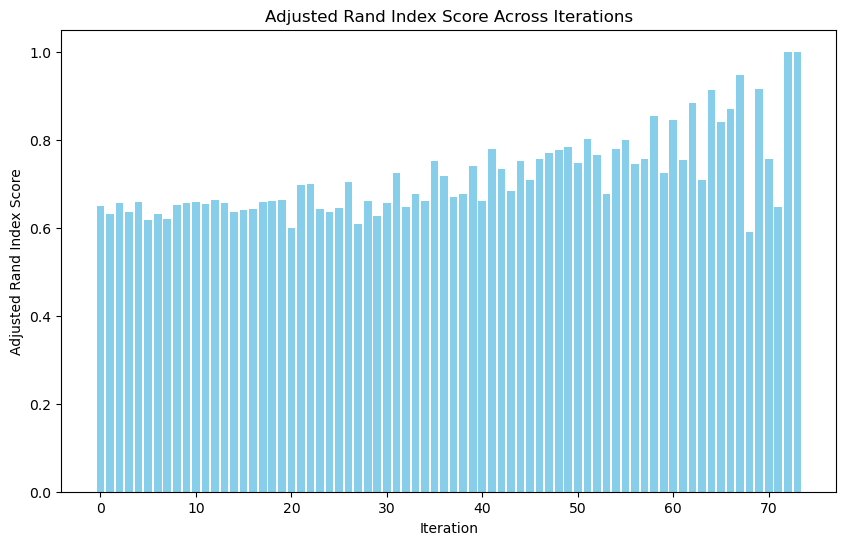

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rand_index_score)), rand_index_score, color='skyblue')
plt.xlabel('Iteration')
plt.ylabel('Adjusted Rand Index Score')
plt.title('Adjusted Rand Index Score Across Iterations')
plt.show()

In [49]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Calculate kmeans clustering
model_1.create_trajectory()
model_1.trajectory.pca_trajectory()
attractor_combo_list = vis_bar.index
concatenated_columns = model_1.attractor.attractors_df.apply(lambda col: ''.join(col.astype(str)), axis=0)
distance_matrix = calculate_endtimepoint_distancematrix(simulation_df)

rand_index_score = []
total_index_score = pd.DataFrame()
# For loop to calculate clustering and rand index
for x in tqdm(range(0, 100)):
    for i in range(0, len(attractor_combo_list)-1):
        if i == 0:
            attractor_combo = attractor_combo_list
        else:
            attractor_combo = attractor_combo_list[:-i]
        model_list = concatenated_columns.index[concatenated_columns.isin(attractor_combo)]
        
        # Calculate the k-mean_clustering
        distance_matrix_sub = distance_matrix.loc[distance_matrix.index.isin(model_list), distance_matrix.index.isin(model_list)]
        model_name = list(distance_matrix_sub.index.unique())
        
        # Euclidean k-means
        kmeans = KMeans(n_clusters=75-i, random_state=x)
        kmeans.fit(distance_matrix_sub)
        clusters = kmeans.labels_
        cluster_dict = dict(zip(list(model_name),list(clusters)))

        # Get the cluster labels
        concatenated_columns_sub = concatenated_columns[concatenated_columns.isin(attractor_combo)]
        unique_labels = {label: idx + 1 for idx, label in enumerate(concatenated_columns_sub.unique())}
        concatenated_columns_sub = concatenated_columns_sub.map(unique_labels)

        # Create a DataFrame from the cluster dictionary
        cluster_df = pd.DataFrame.from_dict(cluster_dict, orient='index', columns=['Cluster'])
        cluster_df = pd.concat([cluster_df, concatenated_columns_sub], axis=1).rename(columns={0: 'Attractor'}).rename(columns={'index': 'model_id'})

        # Calculate the adjusted Rand index
        ari = adjusted_rand_score(cluster_df.Cluster, cluster_df.Attractor)
        rand_index_score = rand_index_score + [ari]
        rand_index_score = pd.DataFrame(rand_index_score)
    total_index_score = pd.concat([total_index_score, rand_index_score], axis=1)

Trajectory object created


  0%|          | 0/100 [00:28<?, ?it/s]


KeyboardInterrupt: 

,0,0
0,0.586423,0.586423
1,0.585141,0.585141
2,0.610683,0.610683
3,0.598075,0.598075
4,0.591035,0.591035
...,...,...
69,1.000000,1.000000
70,1.000000,1.000000
71,1.000000,1.000000
72,1.000000,1.000000


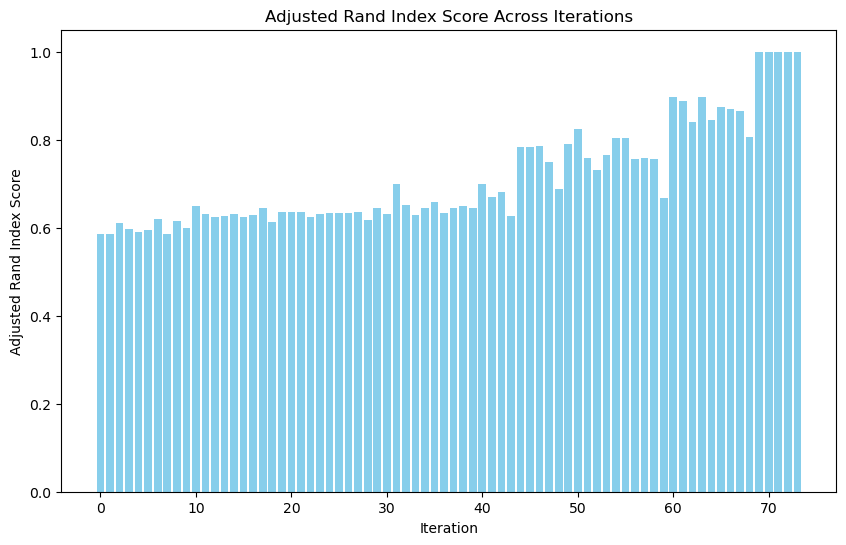

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rand_index_score)), rand_index_score, color='skyblue')
plt.xlabel('Iteration')
plt.ylabel('Adjusted Rand Index Score')
plt.title('Adjusted Rand Index Score Across Iterations')
plt.show()

In [ ]:
def calculate_endtimepoint_distancematrix(simulation_df):
    end_timepoint = simulation_df.timepoint.unique().max()
    simulation_df = simulation_df[simulation_df.timepoint == end_timepoint]

    # Make the model_id the index
    simulation_df = simulation_df.set_index('model_id')
    model_name = simulation_df.index
    simulation_df = simulation_df.drop(columns=['timepoint'])

    # Convert simulation_df to numpy.array
    simulation_array = simulation_df.to_numpy()

    # Create the distance matrix from the simulation
    distance_matrix = squareform(pdist(simulation_array, metric='euclidean'))
    distance_matrix = pd.DataFrame(distance_matrix, columns=model_name, index=model_name)

    return(distance_matrix)

def calculate_total_distancematrix(simulation_df):
    # Make the model_id the index
    simulation_df.model_id = simulation_df.model_id.astype('category')
    node_list = simulation_df.columns.drop(['timepoint','model_id'])
    model_name = simulation_df.model_id.unique()
    
    # Convert simulation_df to numpy.array
    model_original_all = {}
    for i in model_name:
        model_original = simulation_df.loc[simulation_df.model_id == i,node_list].values
        model_original_all[i] = np.array(model_original)
    pca_all_trajectory = np.array(list(model_original_all.values()))

    # Initialize an empty distance matrix
    num_trajectories = len(pca_all_trajectory)
    distance_matrix = np.zeros((num_trajectories, num_trajectories))

    # Calculate DTW distance for each pair of trajectories
    for i in tqdm(range(num_trajectories)):
        for j in range(num_trajectories):
            distance_matrix[i, j] = dtw(pca_all_trajectory[i], pca_all_trajectory[j])

    # Display the distance matrix
    distance_matrix = pd.DataFrame(distance_matrix, index=model_name, columns=model_name)

    return(distance_matrix)

def plot_distance_matrix(distance_matrix):
    # Visualize clusters with MDS
    #distance_matrix = model.succession_diagram.distance_matrix
    mds = MDS(dissimilarity='precomputed', random_state=12345)
    coords = mds.fit_transform(distance_matrix)

    plt.figure(figsize=(6, 5))
    plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
    plt.title('Distance matrix visualized with MDS')
    plt.show()